In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import glob
import time
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (3,3)
import os
import sys

from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad

print(time.ctime())

Mon Jun  6 17:16:13 2022


In [2]:
file_path = 'D:/Quantum_Astrometry_Project/SNSPD/060522_VV/'

In [3]:
pairs_12 = np.load(file_path+'pairs1_2.npy')
pairs_13 = np.load(file_path+'pairs1_3.npy')
pairs_14 = np.load(file_path+'pairs1_4.npy')
pairs_23 = np.load(file_path+'pairs2_3.npy')
pairs_24 = np.load(file_path+'pairs2_4.npy')
pairs_34 = np.load(file_path+'pairs3_4.npy')

In [4]:
print(pairs_13)

[[761842385623447837              -3766]
 [761842385636643347              19563]
 [761842385742834899             -19173]
 ...
 [764060761637870947              19951]
 [764060761752235183               2538]
 [764060761807997268               7793]]


In [5]:
print(pairs_14)

[[761842384815251389              16491]
 [761842385187852481               6934]
 [761842385377379046              15291]
 ...
 [764060759311618328              14133]
 [764060759473903521             -14899]
 [764060760259471540               2585]]


In [6]:
print(pairs_23)

[[761842384816272867              14112]
 [761842384910988936               7290]
 [761842385109226615              18634]
 ...
 [764060761377232161              16359]
 [764060761476268057              -4016]
 [764060761528540480             -12037]]


In [7]:
print(pairs_24)

[[761842384906526724              17081]
 [761842385077664492               4031]
 [761842385317158319                423]
 ...
 [764060760999911685              -2310]
 [764060761109300695             -18395]
 [764060761524811370              -3253]]


In [8]:
print(pairs_34)

[[761842384815220421             -14477]
 [761842384906500473              -9170]
 [761842385010177908             -16762]
 ...
 [764060760819912593              16888]
 [764060761222706942              -1936]
 [764060761398700163               1998]]


In [9]:
def gauss(x, A, t0, sigma, d):
    y = abs(A)*np.exp(-(x-t0)**2/(2.*abs(sigma)**2)) + d
    return y

In [10]:
def v_err(A,D,sigma_A,sigma_D):
    return (A/D)*np.sqrt((sigma_A/A)**2 + (sigma_D/D)**2)

In [11]:
nbins = 500

In [12]:
h12_total=np.histogram(pairs_12[:][:,1],bins=nbins)
h13_total=np.histogram(pairs_13[:][:,1],bins=nbins)
h14_total=np.histogram(pairs_14[:][:,1],bins=nbins)
h23_total=np.histogram(pairs_23[:][:,1],bins=nbins)
h24_total=np.histogram(pairs_24[:][:,1],bins=nbins)
h34_total=np.histogram(pairs_34[:][:,1],bins=nbins)

In [13]:
x = np.linspace(-20,20,nbins+1)

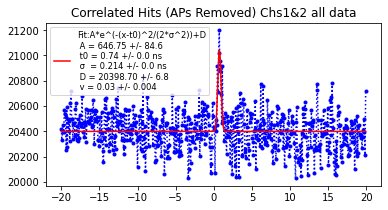

In [14]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs1&2 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h12_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h12_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_12"] = ((best_vals[1]))
globals()["sigma_12"] = abs((best_vals[2]))
globals()["v_12"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch12_peak.png')

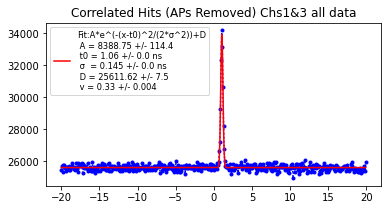

In [15]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs1&3 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h13_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h13_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))
globals()["v_13"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch13_peak.png')

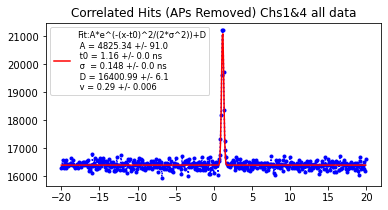

In [16]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs1&4 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h14_total[0], p0 = [50000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h14_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_14"] = ((best_vals[1]))
globals()["sigma_14"] = abs((best_vals[2]))
globals()["v_14"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch14_peak.png')

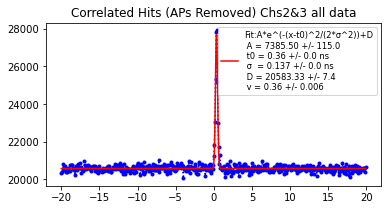

In [17]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs2&3 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h23_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h23_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_23"] = ((best_vals[1]))
globals()["sigma_23"] = abs((best_vals[2]))
globals()["v_23"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch23_peak.png')

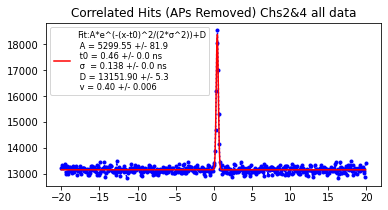

In [18]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs2&4 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h24_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h24_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_24"] = ((best_vals[1]))
globals()["sigma_24"] = abs((best_vals[2]))
globals()["v_24"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch24_peak.png')

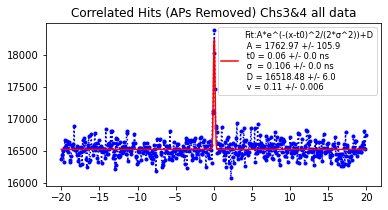

In [19]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs3&4 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h34_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h34_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_34"] = ((best_vals[1]))
globals()["sigma_34"] = abs((best_vals[2]))
globals()["v_34"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch34_peak.png')

In [20]:
Sigma_Arr = [sigma_12,sigma_13,sigma_14,sigma_23,sigma_24,sigma_34]
t0_Arr = [t0_12,t0_13,t0_14,t0_23,t0_24,t0_34]
visibility_arr = [v_12, v_13, v_14, v_23, v_24, v_34,]
print(Sigma_Arr)
print(t0_Arr)
print(visibility_arr)

[0.2135057787186688, 0.14476975005547943, 0.1478414416250863, 0.13658553651271585, 0.13830253209532736, 0.10616507377798083]
[0.7427031574515339, 1.0580258604499324, 1.163098453947107, 0.3580923569882311, 0.4570423830468814, 0.05643831971068636]
[0.03170552335687667, 0.327536666929054, 0.2942102611596469, 0.35880979446702915, 0.40294921934447564, 0.10672724919611178]


In [21]:
np.save(file_path+'new_Sigma_Arr_noAP', Sigma_Arr)
np.save(file_path+'new_t0_Arr_noAP', t0_Arr)
np.save(file_path+'new_visibility_arr',visibility_arr)

In [22]:
sigma_range = 1.5
sigma_arr = np.load(file_path+'new_Sigma_Arr_noAP.npy')
t0_arr = np.load(file_path+'new_t0_Arr_noAP.npy')

dt_lower = ((t0_arr - (sigma_range * sigma_arr)) * 1e3)
dt_upper = ((t0_arr + (sigma_range * sigma_arr)) * 1e3)

print(dt_upper)
print(dt_lower)


[1062.96182553 1275.18048553 1384.86061638  562.97066176  664.49618119
  215.68593038]
[ 422.44448937  840.87123537  941.33629151  153.21405222  249.5885849
 -102.80929096]


In [23]:
print(time.ctime())

pairs = [pairs_12,pairs_13,pairs_14,pairs_23,pairs_24,pairs_34]

first_hit_time_1 = []
dT_1 = []

first_hit_time_2 = []
dT_2 = []

first_hit_time_3 = []
dT_3 = []

first_hit_time_4 = []
dT_4 = []

first_hit_time_5 = []
dT_5 = []

first_hit_time_6 = []
dT_6 = []

for i in range(0,6):
    t = []
    dt = []
    dt = np.concatenate((dt,pairs[i][:,1]),axis=None)
    t = np.concatenate((t,pairs[i][:,0]),axis=None)

    dt_ind = np.logical_and(dt<dt_upper[i], dt>dt_lower[i])
 
    dt_ordered = dt[dt_ind]
    t_ordered = t[dt_ind]
    
    if i == 0:
        dT_1 = np.concatenate((dT_1,dt_ordered),axis=None)
        first_hit_time_1 = np.concatenate((first_hit_time_1,t_ordered),axis=None)
    elif i == 1:
        dT_2 = np.concatenate((dT_2,dt_ordered),axis=None)
        first_hit_time_2 = np.concatenate((first_hit_time_2,t_ordered),axis=None)
    elif i == 2:
        dT_3 = np.concatenate((dT_3,dt_ordered),axis=None)
        first_hit_time_3 = np.concatenate((first_hit_time_3,t_ordered),axis=None)
    elif i == 3:
        dT_4 = np.concatenate((dT_4,dt_ordered),axis=None)
        first_hit_time_4 = np.concatenate((first_hit_time_4,t_ordered),axis=None)
    elif i == 4:
        dT_5 = np.concatenate((dT_5,dt_ordered),axis=None)
        first_hit_time_5 = np.concatenate((first_hit_time_5,t_ordered),axis=None)
    elif i == 5:
        dT_6 = np.concatenate((dT_6,dt_ordered),axis=None)
        first_hit_time_6 = np.concatenate((first_hit_time_6,t_ordered),axis=None)
        
print(time.ctime())

Mon Jun  6 17:16:56 2022
Mon Jun  6 17:16:58 2022


In [24]:
pp12 = np.column_stack([first_hit_time_1,dT_1])[:][:,0]
pp13 = np.column_stack([first_hit_time_2,dT_2])[:][:,0]
pp14 = np.column_stack([first_hit_time_3,dT_3])[:][:,0]
pp23 = np.column_stack([first_hit_time_4,dT_4])[:][:,0]
pp24 = np.column_stack([first_hit_time_5,dT_5])[:][:,0]
pp34 = np.column_stack([first_hit_time_6,dT_6])[:][:,0]

print(time.ctime())

Mon Jun  6 17:16:58 2022


In [25]:
exp_len = (max(pp12[-1],pp13[-1],pp14[-1],pp23[-1],pp24[-1],pp34[-1])-min(pp12[0],pp13[0],pp14[0],pp23[0],pp24[0],pp34[0]))/60/1e12
# exp_len = 69
print(exp_len)

36.97291143585707


In [26]:
nbins = int(exp_len*15)
print(nbins)

554


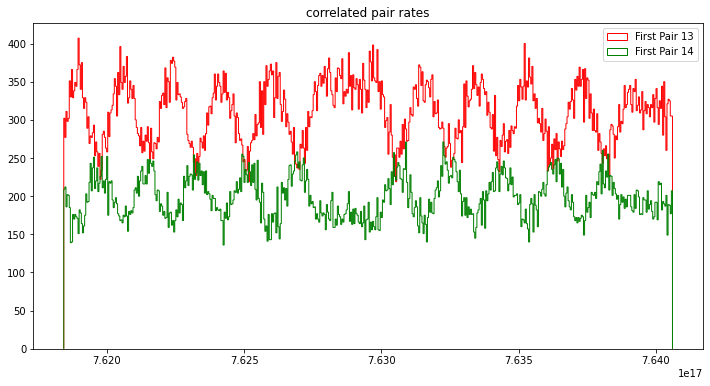

In [27]:
fig, ax = plt.subplots(figsize = (12,6))
#h12 = ax.hist(pp12, bins = nbins, histtype = 'step', color = 'blue', label = 'First Pair 12');
h13 = ax.hist(pp13, bins = nbins, histtype = 'step', color = 'red', label = 'First Pair 13');
h14 = ax.hist(pp14, bins = nbins, histtype = 'step', color = 'green', label = 'First Pair 14');
#h23 = ax.hist(pp23, bins = nbins, histtype = 'step', color = 'black', label = 'First Pair 23');
#h24 = ax.hist(pp24, bins = nbins, histtype = 'step', color = 'orange', label = 'First Pair 24');
#h34 = ax.hist(pp34, bins = nbins, histtype = 'step', color = 'magenta', label = 'First Pair 34');
ax.legend()
ax.set_title('correlated pair rates')
#ax.set_xlim(6.232e17,6.234e17)
#ax.set_ylim(7000,9000)
plt.savefig(file_path+'results/13_14_anti_phase_cor_rates.png')
#ax.errorbar(h12[1][:-1],h12[0],xerr=0,yerr = stats.sem(h12[0]),linestyle = 'none')


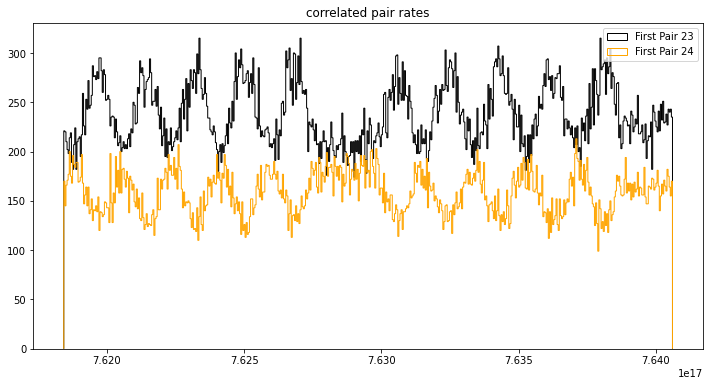

In [28]:
fig, ax = plt.subplots(figsize = (12,6))
#h12 = ax.hist(pp12, bins = nbins, histtype = 'step', color = 'blue', label = 'First Pair 12');
#h13 = ax.hist(pp13, bins = nbins, histtype = 'step', color = 'red', label = 'First Pair 13');
#h14 = ax.hist(pp14, bins = nbins, histtype = 'step', color = 'green', label = 'First Pair 14');
h23 = ax.hist(pp23, bins = nbins, histtype = 'step', color = 'black', label = 'First Pair 23');
h24 = ax.hist(pp24, bins = nbins, histtype = 'step', color = 'orange', label = 'First Pair 24');
#h34 = ax.hist(pp34, bins = nbins, histtype = 'step', color = 'magenta', label = 'First Pair 34');
ax.legend()
ax.set_title('correlated pair rates')
#ax.set_xlim(6.232e17,6.234e17)
#ax.set_ylim(7000,9000)
plt.savefig(file_path+'results/23_24_anti_phase_cor_rates.png')
#ax.errorbar(h12[1][:-1],h12[0],xerr=0,yerr = stats.sem(h12[0]),linestyle = 'none')


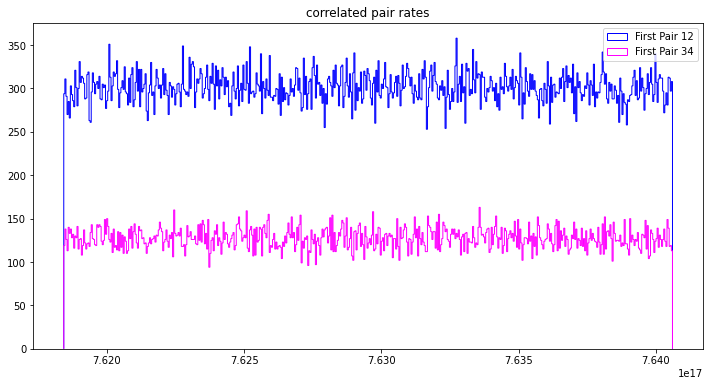

In [29]:
fig, ax = plt.subplots(figsize = (12,6))
h12 = ax.hist(pp12, bins = nbins, histtype = 'step', color = 'blue', label = 'First Pair 12');
#h13 = ax.hist(pp13, bins = nbins, histtype = 'step', color = 'red', label = 'First Pair 13');
#h14 = ax.hist(pp14, bins = nbins, histtype = 'step', color = 'green', label = 'First Pair 14');
#h23 = ax.hist(pp23, bins = nbins, histtype = 'step', color = 'black', label = 'First Pair 23');
#h24 = ax.hist(pp24, bins = nbins, histtype = 'step', color = 'orange', label = 'First Pair 24');
h34 = ax.hist(pp34, bins = nbins, histtype = 'step', color = 'magenta', label = 'First Pair 34');
ax.legend()
ax.set_title('correlated pair rates')
#ax.set_xlim(6.232e17,6.234e17)
#ax.set_ylim(7000,9000)
plt.savefig(file_path+'results/12_34_cor_rates.png')
#ax.errorbar(h12[1][:-1],h12[0],xerr=0,yerr = stats.sem(h12[0]),linestyle = 'none')


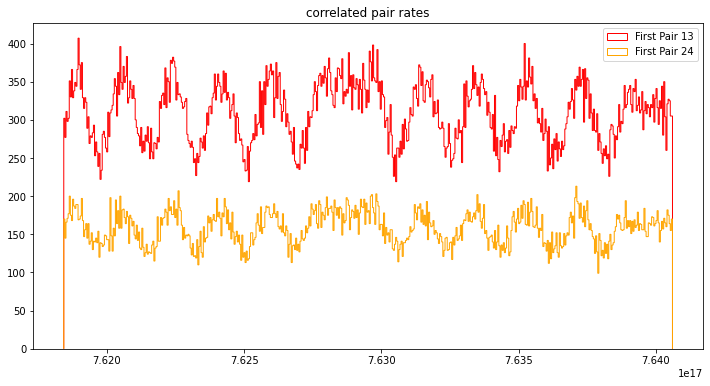

In [30]:
fig, ax = plt.subplots(figsize = (12,6))
#h12 = ax.hist(pp12, bins = nbins, histtype = 'step', color = 'blue', label = 'First Pair 12');
h13 = ax.hist(pp13, bins = nbins, histtype = 'step', color = 'red', label = 'First Pair 13');
#h14 = ax.hist(pp14, bins = nbins, histtype = 'step', color = 'green', label = 'First Pair 14');
#h23 = ax.hist(pp23, bins = nbins, histtype = 'step', color = 'black', label = 'First Pair 23');
h24 = ax.hist(pp24, bins = nbins, histtype = 'step', color = 'orange', label = 'First Pair 24');
#h34 = ax.hist(pp34, bins = nbins, histtype = 'step', color = 'magenta', label = 'First Pair 34');
ax.legend()
ax.set_title('correlated pair rates')
#ax.set_xlim(6.232e17,6.234e17)
#ax.set_ylim(7000,9000)
plt.savefig(file_path+'results/13_24_phase_cor_rates.png')
#ax.errorbar(h12[1][:-1],h12[0],xerr=0,yerr = stats.sem(h12[0]),linestyle = 'none')


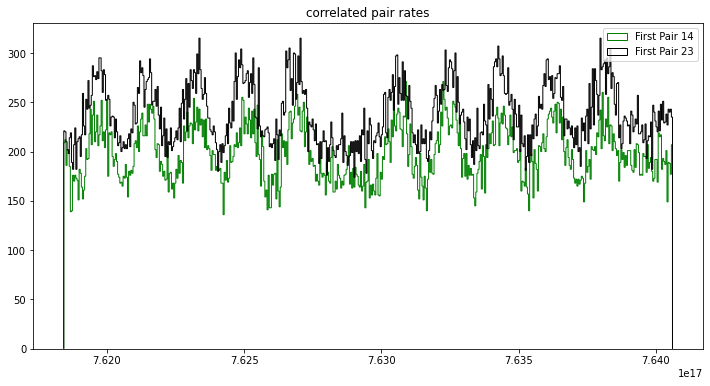

In [31]:
fig, ax = plt.subplots(figsize = (12,6))
#h12 = ax.hist(pp12, bins = nbins, histtype = 'step', color = 'blue', label = 'First Pair 12');
#h13 = ax.hist(pp13, bins = nbins, histtype = 'step', color = 'red', label = 'First Pair 13');
h14 = ax.hist(pp14, bins = nbins, histtype = 'step', color = 'green', label = 'First Pair 14');
h23 = ax.hist(pp23, bins = nbins, histtype = 'step', color = 'black', label = 'First Pair 23');
#h24 = ax.hist(pp24, bins = nbins, histtype = 'step', color = 'orange', label = 'First Pair 24');
#h34 = ax.hist(pp34, bins = nbins, histtype = 'step', color = 'magenta', label = 'First Pair 34');
ax.legend()
ax.set_title('correlated pair rates')
#ax.set_xlim(6.232e17,6.234e17)
#ax.set_ylim(7000,9000)
plt.savefig(file_path+'results/14_23_phase_cor_rates.png')
#ax.errorbar(h12[1][:-1],h12[0],xerr=0,yerr = stats.sem(h12[0]),linestyle = 'none')


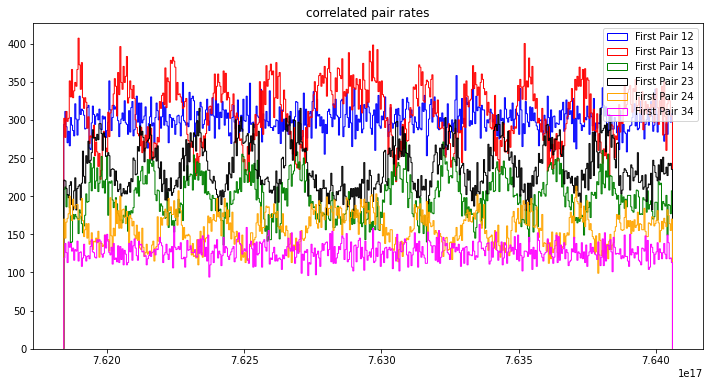

In [32]:
fig, ax = plt.subplots(figsize = (12,6))
h12 = ax.hist(pp12, bins = nbins, histtype = 'step', color = 'blue', label = 'First Pair 12');
h13 = ax.hist(pp13, bins = nbins, histtype = 'step', color = 'red', label = 'First Pair 13');
h14 = ax.hist(pp14, bins = nbins, histtype = 'step', color = 'green', label = 'First Pair 14');
h23 = ax.hist(pp23, bins = nbins, histtype = 'step', color = 'black', label = 'First Pair 23');
h24 = ax.hist(pp24, bins = nbins, histtype = 'step', color = 'orange', label = 'First Pair 24');
h34 = ax.hist(pp34, bins = nbins, histtype = 'step', color = 'magenta', label = 'First Pair 34');
ax.legend()
ax.set_title('correlated pair rates')
#ax.set_xlim(6.232e17,6.234e17)
#ax.set_ylim(7000,9000)
plt.savefig(file_path+'results/all_cor_rates.png')
#ax.errorbar(h12[1][:-1],h12[0],xerr=0,yerr = stats.sem(h12[0]),linestyle = 'none')


In [33]:
print(time.ctime())

Mon Jun  6 17:17:03 2022
